In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-prediction/Used_Car_Price_Prediction.csv


## 📊 Used Car Price Prediction

## Description:
This project focuses on building a machine learning model to estimate the resale value of used cars based on key features such as brand, model, year of manufacture, mileage, fuel type, transmission, and other specifications. By analyzing historical car sales data, the system can identify patterns and predict fair market prices, helping buyers and sellers make informed decisions. The solution can be applied in online marketplaces, dealerships, and personal financial planning.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/used-car-price-prediction/Used_Car_Price_Prediction.csv")

In [3]:
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [4]:
df.tail()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
7395,honda amaze,2018,diesel,53486,604299,ghaziabad,2756,sedan,NaN,1.5 v cvt i-dtec,...,1,630810,787750.0,great,2021-02-07T08:05:30.443,True,14036,90645,True,False
7396,maruti ignis,2018,petrol,8854,562599,chennai,640,hatchback,manual,delta 1.2 k12,...,1,549440,NaN,great,2021-03-31T10:21:56.289,True,13068,84390,False,False
7397,honda amaze,2015,petrol,46300,400499,pune,795,sedan,manual,1.2 smt i vtec,...,1,383419,NaN,great,2021-03-04T12:40:38.652,True,9303,60075,True,False
7398,maruti alto k10,2016,petrol,27245,284099,new delhi,1155,hatchback,manual,lxi,...,1,286515,369885.0,great,2021-03-16T13:31:39.766,True,6599,42615,False,False
7399,mahindra thar,2017,diesel,37134,671399,new delhi,4603,suv,manual,crde 4x4 bs iv,...,1,646565,NaN,great,2021-03-07T10:10:19.937,True,15595,100710,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7274 non-null   o

In [6]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000,7.400000e+03,4.120000e+03,7400.000000,7400.000000
mean,2013.885676,62624.520000,4.548892e+05,1550.706081,1.327297,4.322044e+05,5.510351e+05,10565.942027,68233.529054
std,3.087613,43532.042371,2.827023e+05,2080.952842,0.579798,2.880316e+05,3.119887e+05,6566.468434,42405.389468
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,9.689900e+04,0.000000,0.000000
25%,2012.000000,31885.250000,2.811740e+05,554.750000,1.000000,2.526612e+05,3.414930e+05,6531.250000,42176.250000
50%,2014.000000,55765.000000,3.824490e+05,1088.000000,1.000000,3.611445e+05,4.674800e+05,8883.000000,57367.500000
75%,2016.000000,84184.000000,5.401490e+05,1926.500000,2.000000,5.260180e+05,6.675258e+05,12546.250000,81022.500000
max,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,2.765057e+06,89798.000000,579901.000000


In [7]:
df.isnull().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type               103
transmission            556
variant                   0
assured_buy               0
registered_city          10
registered_state         10
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.dtypes

car_name                object
yr_mfr                   int64
fuel_type               object
kms_run                  int64
sale_price               int64
city                    object
times_viewed             int64
body_type               object
transmission            object
variant                 object
assured_buy               bool
registered_city         object
registered_state        object
is_hot                    bool
rto                     object
source                  object
make                    object
model                   object
car_availability        object
total_owners             int64
broker_quote             int64
original_price         float64
car_rating              object
ad_created_on           object
fitness_certificate     object
emi_starts_from          int64
booking_down_pymnt       int64
reserved                  bool
warranty_avail            bool
dtype: object

In [10]:
df.shape

(7400, 29)

In [11]:
df.columns

Index(['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city',
       'times_viewed', 'body_type', 'transmission', 'variant', 'assured_buy',
       'registered_city', 'registered_state', 'is_hot', 'rto', 'source',
       'make', 'model', 'car_availability', 'total_owners', 'broker_quote',
       'original_price', 'car_rating', 'ad_created_on', 'fitness_certificate',
       'emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail'],
      dtype='object')

## Data visualizations

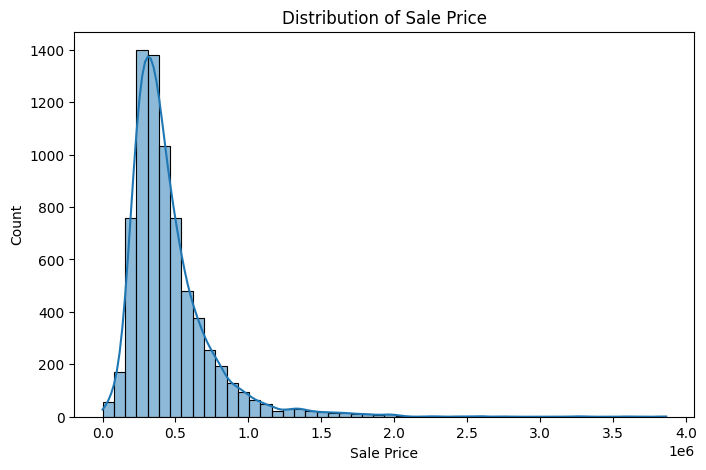

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['sale_price'], bins=50, kde=True)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

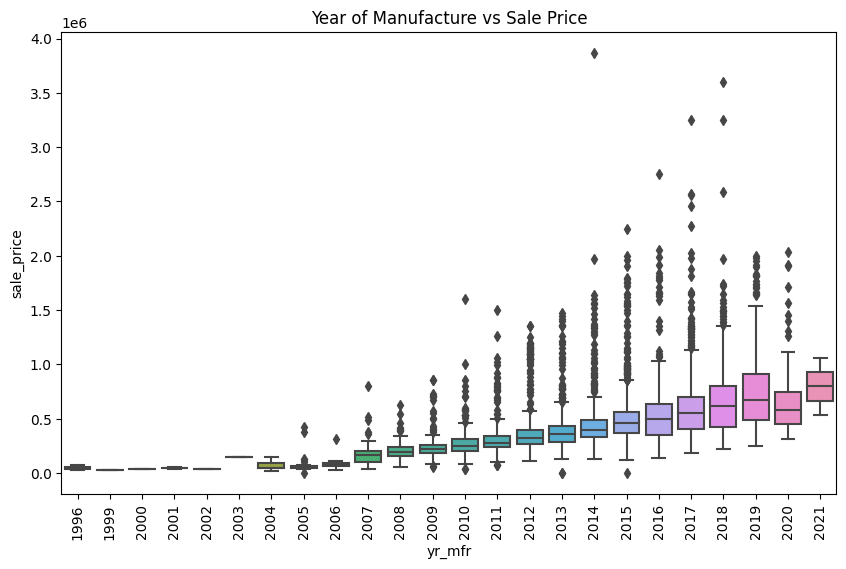

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='yr_mfr', y='sale_price', data=df)
plt.xticks(rotation=90)
plt.title("Year of Manufacture vs Sale Price")
plt.show()

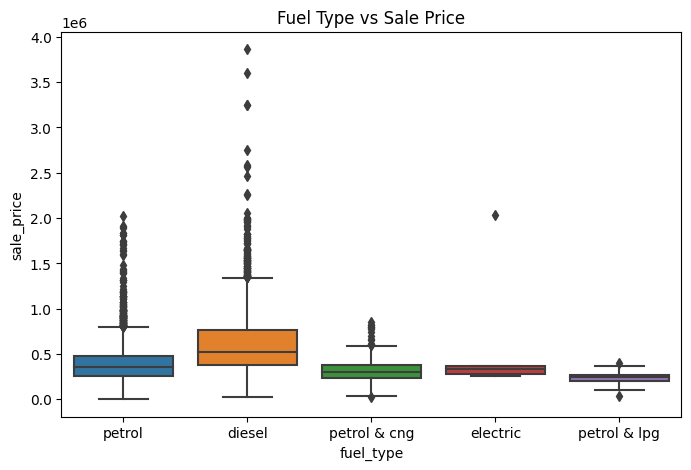

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fuel_type', y='sale_price', data=df)
plt.title("Fuel Type vs Sale Price")
plt.show()

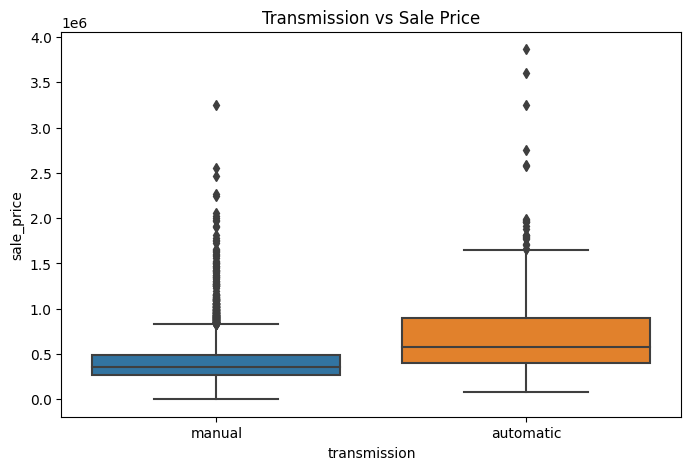

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='transmission', y='sale_price', data=df)
plt.title("Transmission vs Sale Price")
plt.show()

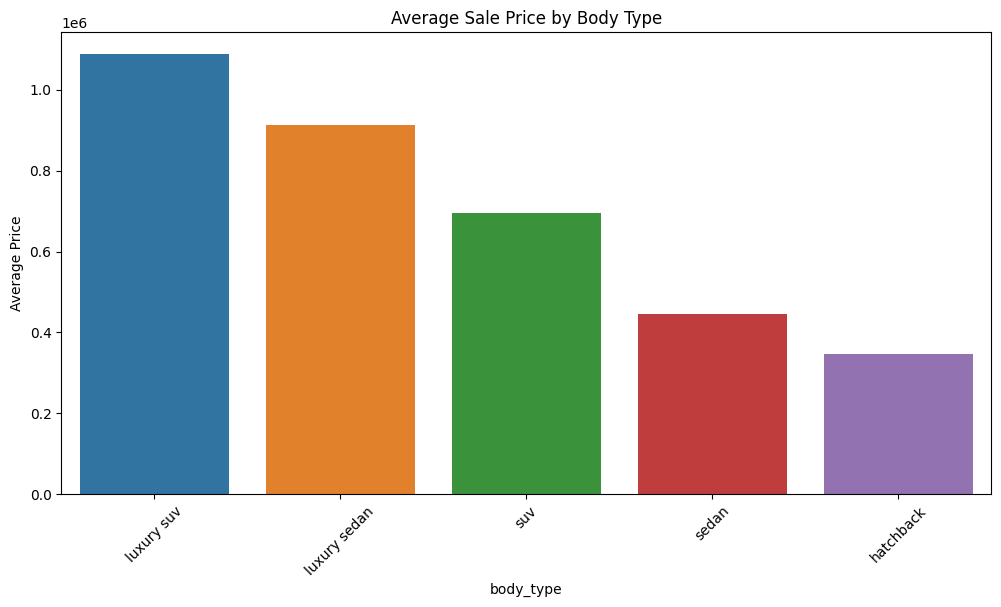

In [16]:
plt.figure(figsize=(12,6))
avg_price_body = df.groupby("body_type")["sale_price"].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_body.index, y=avg_price_body.values)
plt.xticks(rotation=45)
plt.title("Average Sale Price by Body Type")
plt.ylabel("Average Price")
plt.show()

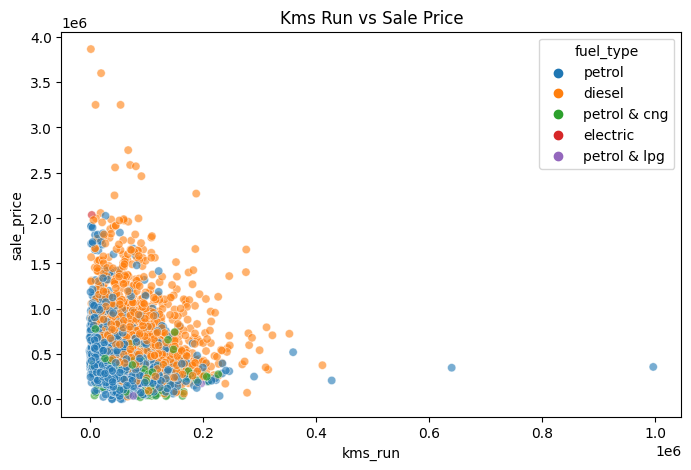

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='kms_run', y='sale_price', hue='fuel_type', data=df, alpha=0.6)
plt.title("Kms Run vs Sale Price")
plt.show()

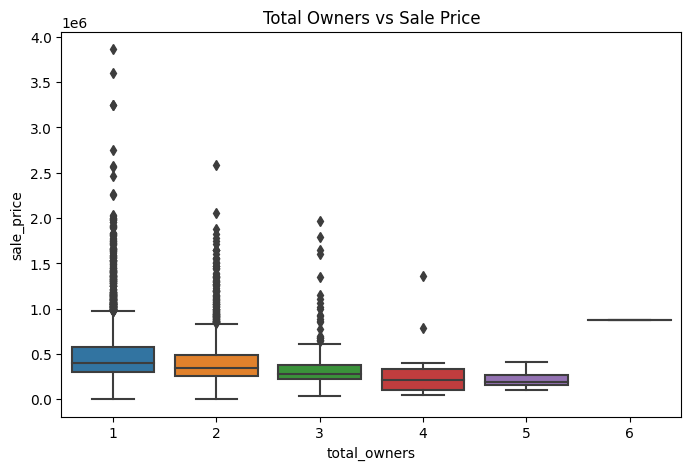

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='total_owners', y='sale_price', data=df)
plt.title("Total Owners vs Sale Price")
plt.show()

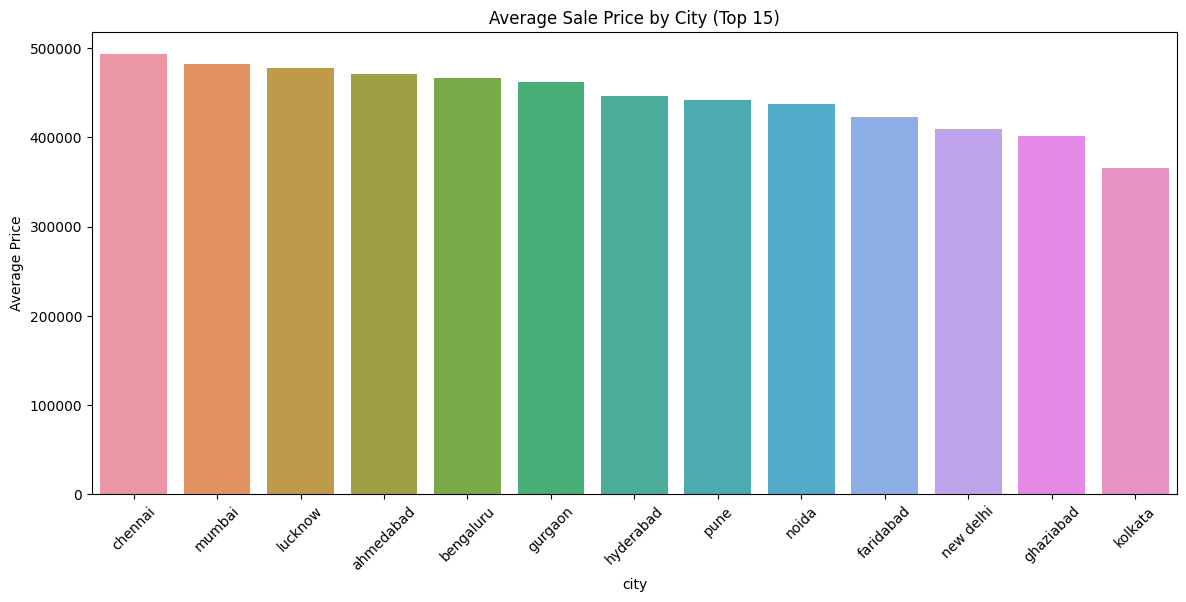

In [19]:
plt.figure(figsize=(14,6))
avg_city = df.groupby("city")["sale_price"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_city.index, y=avg_city.values)
plt.xticks(rotation=45)
plt.title("Average Sale Price by City (Top 15)")
plt.ylabel("Average Price")
plt.show()

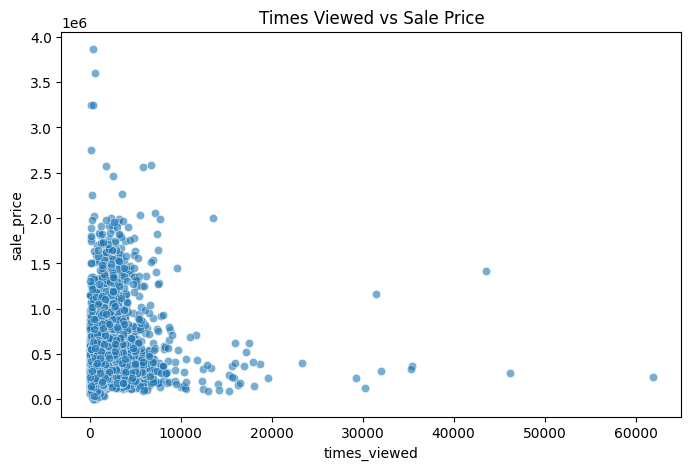

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='times_viewed', y='sale_price', data=df, alpha=0.6)
plt.title("Times Viewed vs Sale Price")
plt.show()

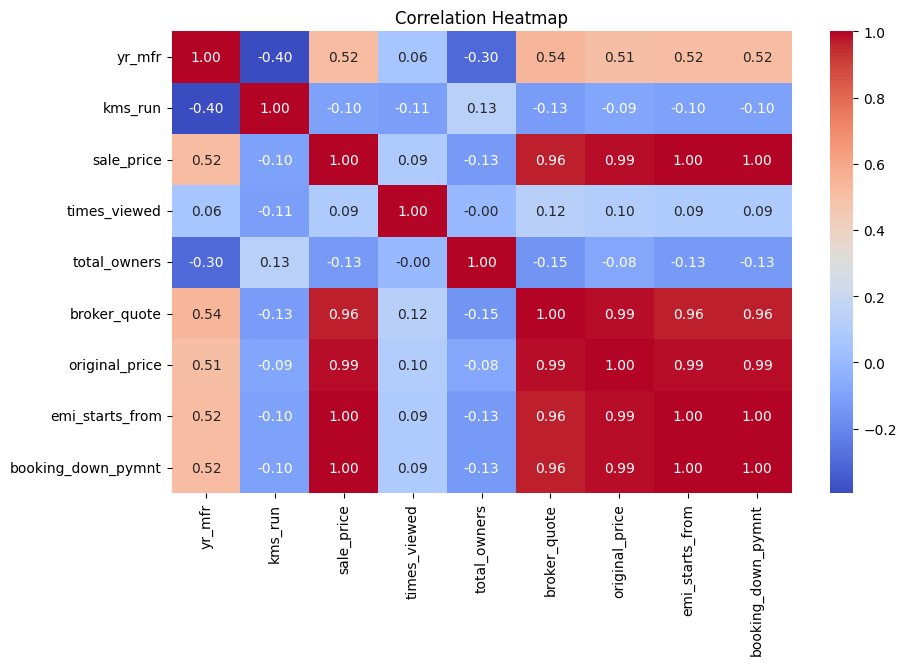

In [21]:
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Predictive modeling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [23]:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False

In [24]:
df = df.dropna(subset=["sale_price"])

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())


In [25]:
for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(str)

In [26]:
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [27]:
X = df.drop("sale_price", axis=1)
y = df["sale_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
}

In [30]:
if xgb_available:
    models["XGBoost"] = XGBRegressor(n_estimators=100, random_state=42)

In [31]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = r2_score(y_test, y_pred) * 100  # percentage
    results[name] = acc
    print(f"{name}: {acc:.2f}%")

Linear Regression: 100.00%
Decision Tree: 99.99%
Random Forest: 100.00%
Gradient Boosting: 99.99%
KNN: 91.87%
SVR: -4.49%
XGBoost: 99.81%


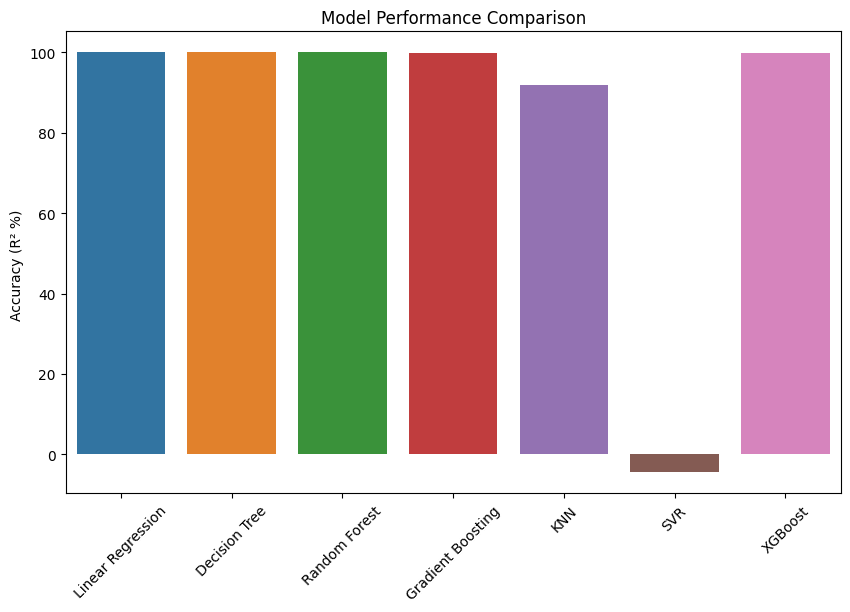

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy (R² %) ")
plt.title("Model Performance Comparison")
plt.show()

## Thank you...pls upvote!!!!